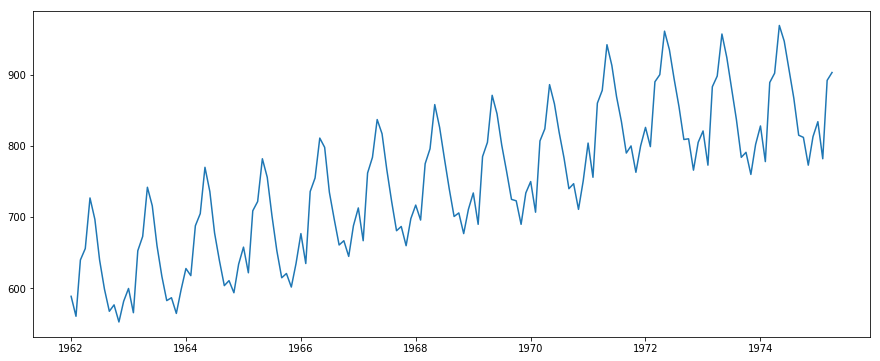

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('monthly-milk-production-pounds-p (1).csv', parse_dates=['Month'], index_col='Month', nrows=160, date_parser = dateparse)
data = data.dropna()

ts = data["Monthly milk production: pounds per cow. Jan 62 ? Dec 75"]
ts = ts.dropna()

plt.plot(ts)


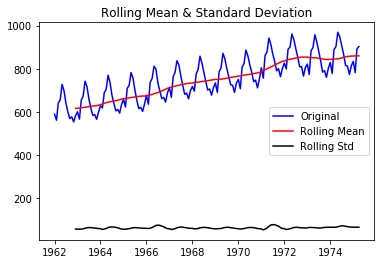

Results of Dickey-Fuller Test:
Test Statistic                  -1.518984
p-value                          0.524100
#Lags Used                      13.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [2]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(timeseries):
    
    rollingmean = timeseries.rolling(window=12).mean()
    rollingstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
    std = plt.plot(rollingstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform DF test:
    print ('Results of Dickey-Fuller Test:')
    dataframetest = adfuller(timeseries, autolag='AIC')
    dataframeoutput = pd.Series(dataframetest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dataframetest[4].items():
        dataframeoutput['Critical Value (%s)'%key] = value
    print (dataframeoutput)
    
testStationarity(ts)


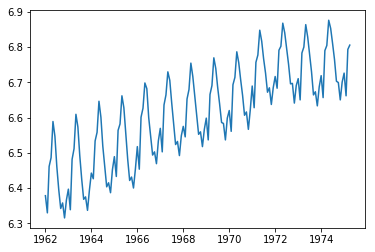

In [3]:
ts_log = np.log(ts)
plt.plot(ts_log)


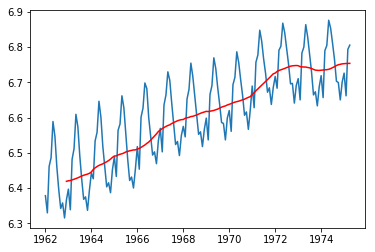

In [4]:
movingAverage = ts_log.rolling(window=12).mean()
movingSTD = ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage, color='red')


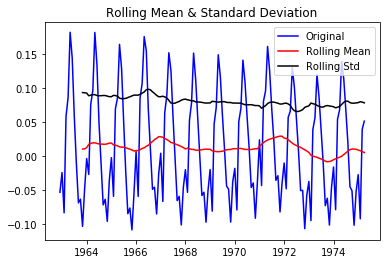

Results of Dickey-Fuller Test:
Test Statistic                  -2.973552
p-value                          0.037439
#Lags Used                      13.000000
Number of Observations Used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64


In [5]:
ts_log_moving_avg_diff = ts_log - movingAverage
ts_log_moving_avg_diff.head(12)
ts_log_moving_avg_diff.dropna(inplace=True)
testStationarity(ts_log_moving_avg_diff)


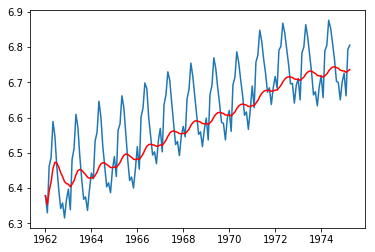

In [6]:
exponentialDecayWeightedAverage = ts_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(ts_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

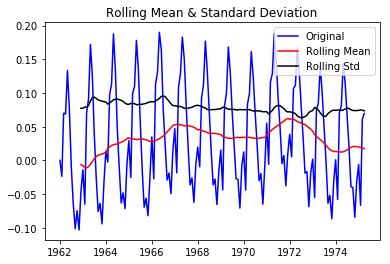

Results of Dickey-Fuller Test:
Test Statistic                  -3.779394
p-value                          0.003125
#Lags Used                      13.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64


In [7]:
ts_log_ewma_diff = ts_log - exponentialDecayWeightedAverage

testStationarity(ts_log_ewma_diff)

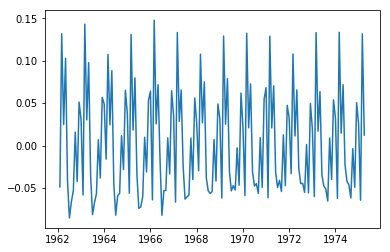

In [8]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

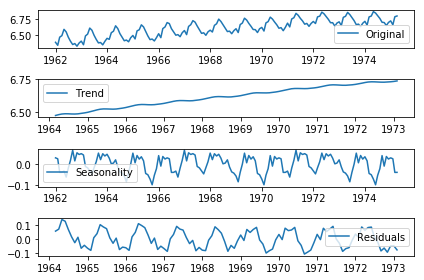

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=52)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


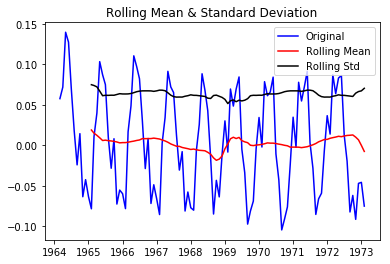

Results of Dickey-Fuller Test:
Test Statistic                 -2.703431
p-value                         0.073446
#Lags Used                      8.000000
Number of Observations Used    99.000000
Critical Value (1%)            -3.498198
Critical Value (5%)            -2.891208
Critical Value (10%)           -2.582596
dtype: float64


In [10]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)

testStationarity(ts_log_decompose)

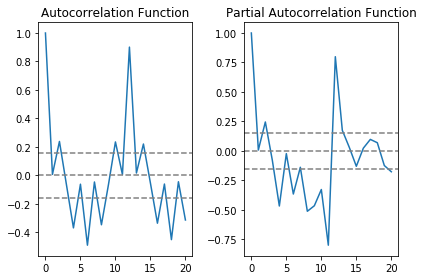

In [11]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf



ts_log_diff= ts_log_diff.dropna()
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout() 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: U

Text(0.5, 1.0, 'RSS: 0.5936')

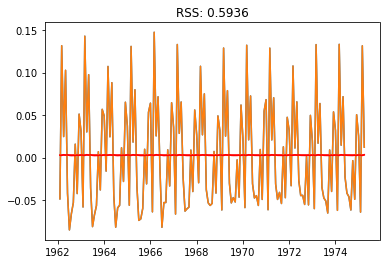

In [13]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(0,1,0))  
results_AR = model.fit(disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))



model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit(s = 12, disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))



Month
1962-02-01    1.972221
1962-03-01    1.396796
1962-04-01    3.451047
1962-05-01    2.241535
1962-06-01    3.297458
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


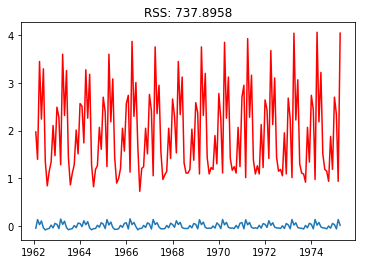

In [14]:
model = ARIMA(ts, order=(1,1,0))  
results_ARIMA = model.fit(s = 12, disp=0)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1962-02-01      1.972221
1962-03-01      3.369018
1962-04-01      6.820065
1962-05-01      9.061600
1962-06-01     12.359058
1962-07-01     13.717457
1962-08-01     14.557494
1962-09-01     15.704709
1962-10-01     17.043909
1962-11-01     19.151054
1962-12-01     20.624645
1963-01-01     23.115762
1963-02-01     25.395694
1963-03-01     26.677299
1963-04-01     30.281934
1963-05-01     32.600264
1963-06-01     35.859325
1963-07-01     37.294518
1963-08-01     38.153754
1963-09-01     39.262571
1963-10-01     40.544176
1963-11-01     42.555328
1963-12-01     44.067316
1964-01-01     46.635227
1964-02-01     49.145543
1964-03-01     50.887914
1964-04-01     54.166174
1964-05-01     56.426907
1964-06-01     59.609174
1964-07-01     60.890778
                 ...    
1972-11-01    255.747208
1972-12-01    256.836827
1973-01-01    259.519930
1973-02-01    261.761465
1973-03-01    262.774289
1973-04-01    266.820493
1973-05-01    269.042829
1973-06-01    272.109904
1973-07-01    273.4

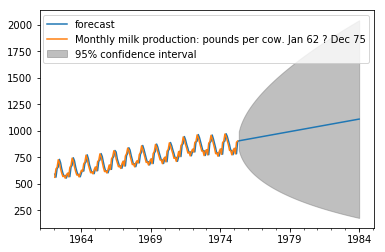

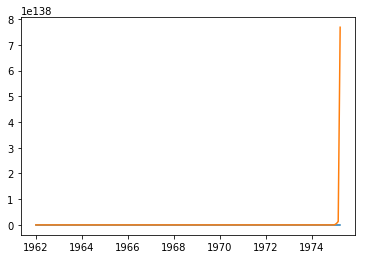

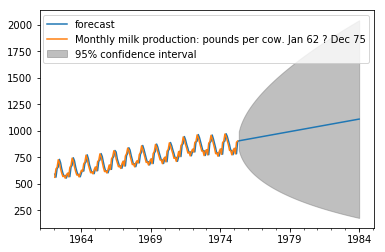

In [16]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
results_ARIMA.plot_predict(1,264) 